# Pymaceuticals Inc.
---

### Analysis
* According to the pie charts more male mice were used.
* By getting rid of the duplicate mouse with the same timepoint as another mouse, the data was more reliable than if mouse g898 was not removed.
* Based on the scatter plots, we can infer that there is a positive correlation since both x and y variables increases.

In [2]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [3]:
# Combine the data into a single dataset
merge_data= pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview
merge_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
merge_data["Mouse ID"].nunique()


249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df=merge_data.loc[merge_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicates_df

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Drop_duplicates= merge_data[merge_data["Mouse ID"].isin(duplicates_df)==False]
Drop_duplicates.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
Drop_duplicates["Mouse ID"].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volum = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor_volume = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv_tumor_volume = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_volume = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_tumor_volume = pd.DataFrame({"Mean": Mean Tumor Volume, 
                                     "Median": Median Tumor Volume, 
                                     "Variance": Tumor Volume Variance, 
                                     "Standard Deviation": Tumor Volume Std. Dev, 
                          "SEM": Tumor Volume Std. Err})

# Assemble the resulting series into a single summary dataframe.
summary_tumor_volume

SyntaxError: invalid syntax (<ipython-input-9-3448b95e7bda>, line 10)

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
# Using the aggregation method, produce the same summary statistics in a single line
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

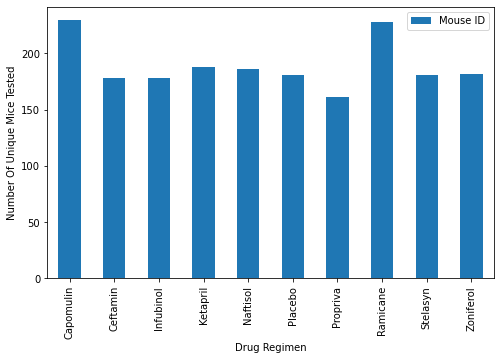

<Figure size 432x288 with 0 Axes>

In [48]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
combined_data = pd.DataFrame(merge_data.groupby(["Drug Regimen"]).count()).reset_index()

regimen_df = combined_data[["Drug Regimen","Mouse ID"]]

regimen_df= regimen_df.set_index("Drug Regimen")
# regimen_df

regimen_df.plot(kind="bar", figsize=(8,5))
plt.xlabel("Drug Regimen")
plt.ylabel("Number Of Unique Mice Tested")

tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Infubinol", "Ceftamin", "Propriva"])


plt.show()
plt.tight_layout()

Text(0, 0.5, 'Number of Unique Mice Tested')

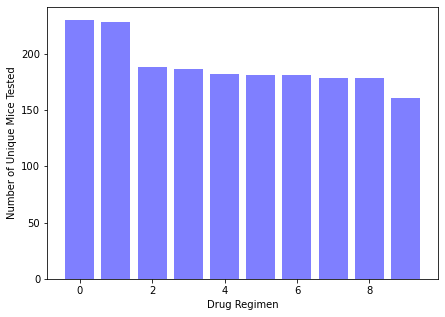

In [50]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.


regimen_count = merge_data["Drug Regimen"].value_counts()

x_axis = np.arange(len(regimen_count))


plt.figure(figsize=(7,5))
plt.bar(x_axis, regimen_count, color='b', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Infubinol", "Ceftamin", "Propriva"])


plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")

(-1.1199395799512024,
 1.1085163149757233,
 -1.1187480755433892,
 1.108793637086287)

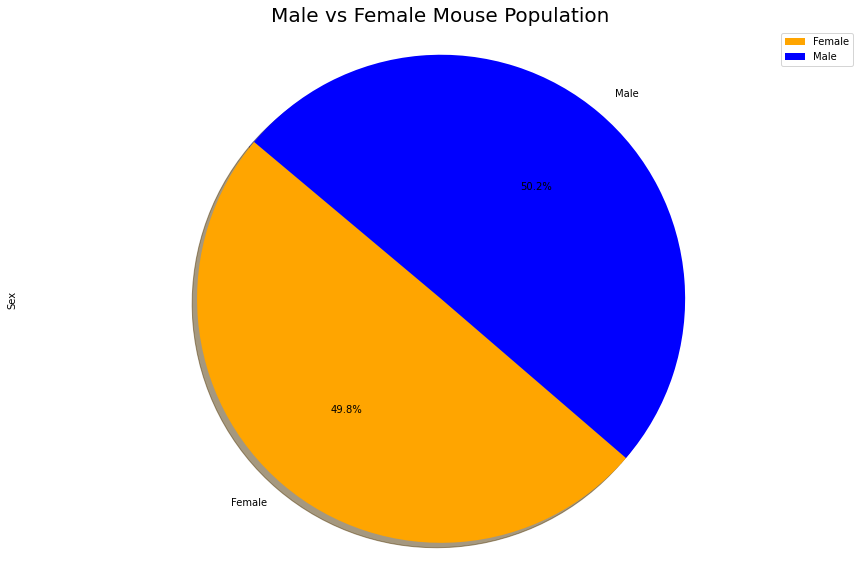

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = merge_data.groupby(["Mouse ID","Sex"])
mouse_gender
gender_data = pd.DataFrame(mouse_gender.size())


total_gender = pd.DataFrame(gender_data.groupby(["Sex"]).count())
total_gender.columns = ["Total Count"]

total_gender["Percentage of Sex"] = (100*(total_gender["Total Count"]/total_gender["Total Count"].sum()))


total_gender["Percentage of Sex"] = total_gender["Percentage of Sex"]


total_gender




colors = ['orange', 'blue']

plot = total_gender.plot.pie(y='Total Count',figsize=(15,10), colors = colors, startangle=140, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex')
plt.axis("equal")

(-1.1756979042636164,
 1.1282937402085897,
 -1.1918349098573184,
 1.1259794268614327)

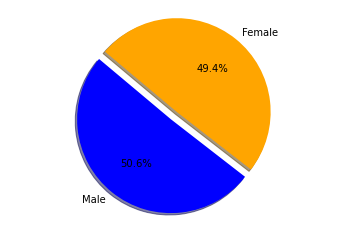

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders=merge_data["Sex"].value_counts()

labels=["Male", "Female"]

colors=["Blue", "Orange"]

explode= (0.1,0)

plt.pie(genders, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_df=pd.DataFrame(merge_data.groupby("Mouse ID")["Timepoint"].max().sort_values().reset_index().rename(columns=
                                                                                                         {"Timepoint": "Max_TP"}))
max_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = pd.merge(merge_data, max_df, on="Mouse ID")
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max_TP
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


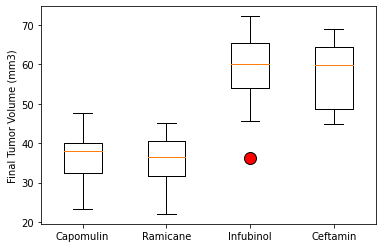

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

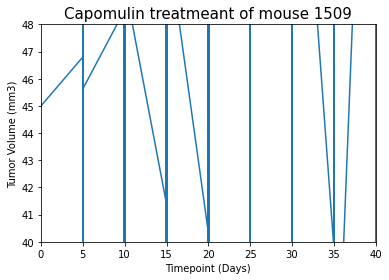

In [45]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

x_axis = merge_data["Timepoint"]
tumor_size = merge_data["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse 1509',fontsize =15)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.plot(x_axis, tumor_size)


plt.xlim(0,40)
plt.ylim(40,48)

plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

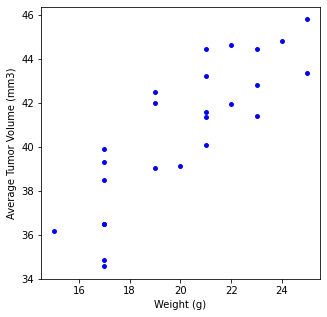

In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(5, 5))
avg_tumor_vol =capomulin_df.groupby(['Mouse ID']).mean()

marker_size=9
plt.scatter(avg_tumor_vol['Weight (g)'],avg_tumor_vol['Tumor Volume (mm3)'],s=15, color="blue")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.58


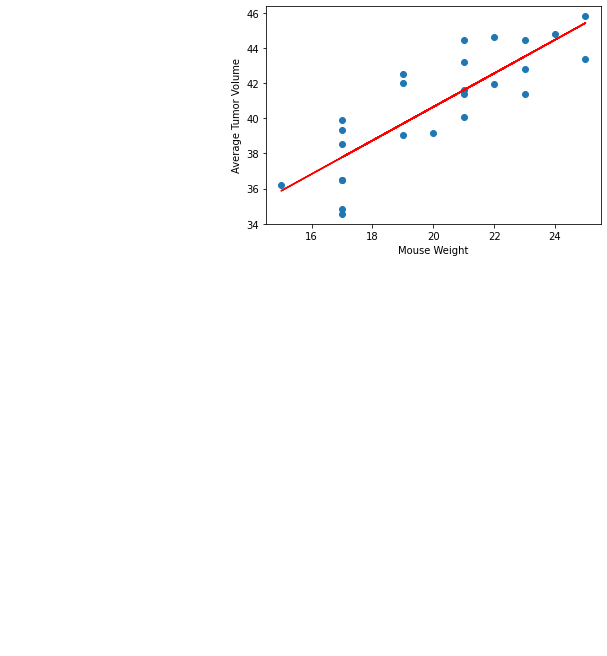

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = avg_tumor_vol.iloc[:,0]
tumor_volume = avg_tumor_vol.iloc[:,1]
correlation = st.pearsonr(mouse_weight,tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[1],2)}")



x_values = avg_tumor_vol['Weight (g)']
y_values = avg_tumor_vol['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()